<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [12]:
claimants = pd.read_csv("/content/claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# Data Analysis/EDA

In [13]:
claimants.shape

(1340, 7)

In [14]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [15]:
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [16]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [17]:
claimants.corr()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.000000,0.011717,0.028151,0.046044,-0.010003,-0.002512,-0.049590
ATTORNEY,0.011717,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.028151,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.046044,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.010003,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,-0.002512,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.049590,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


<Axes: >

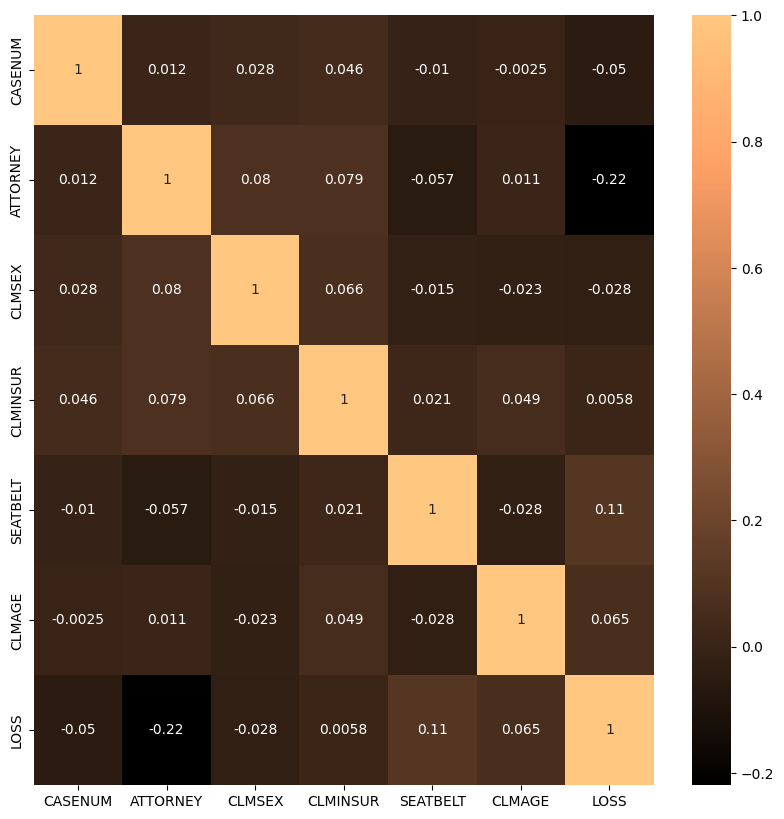

In [18]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(claimants.corr(),annot=True,cmap='copper')

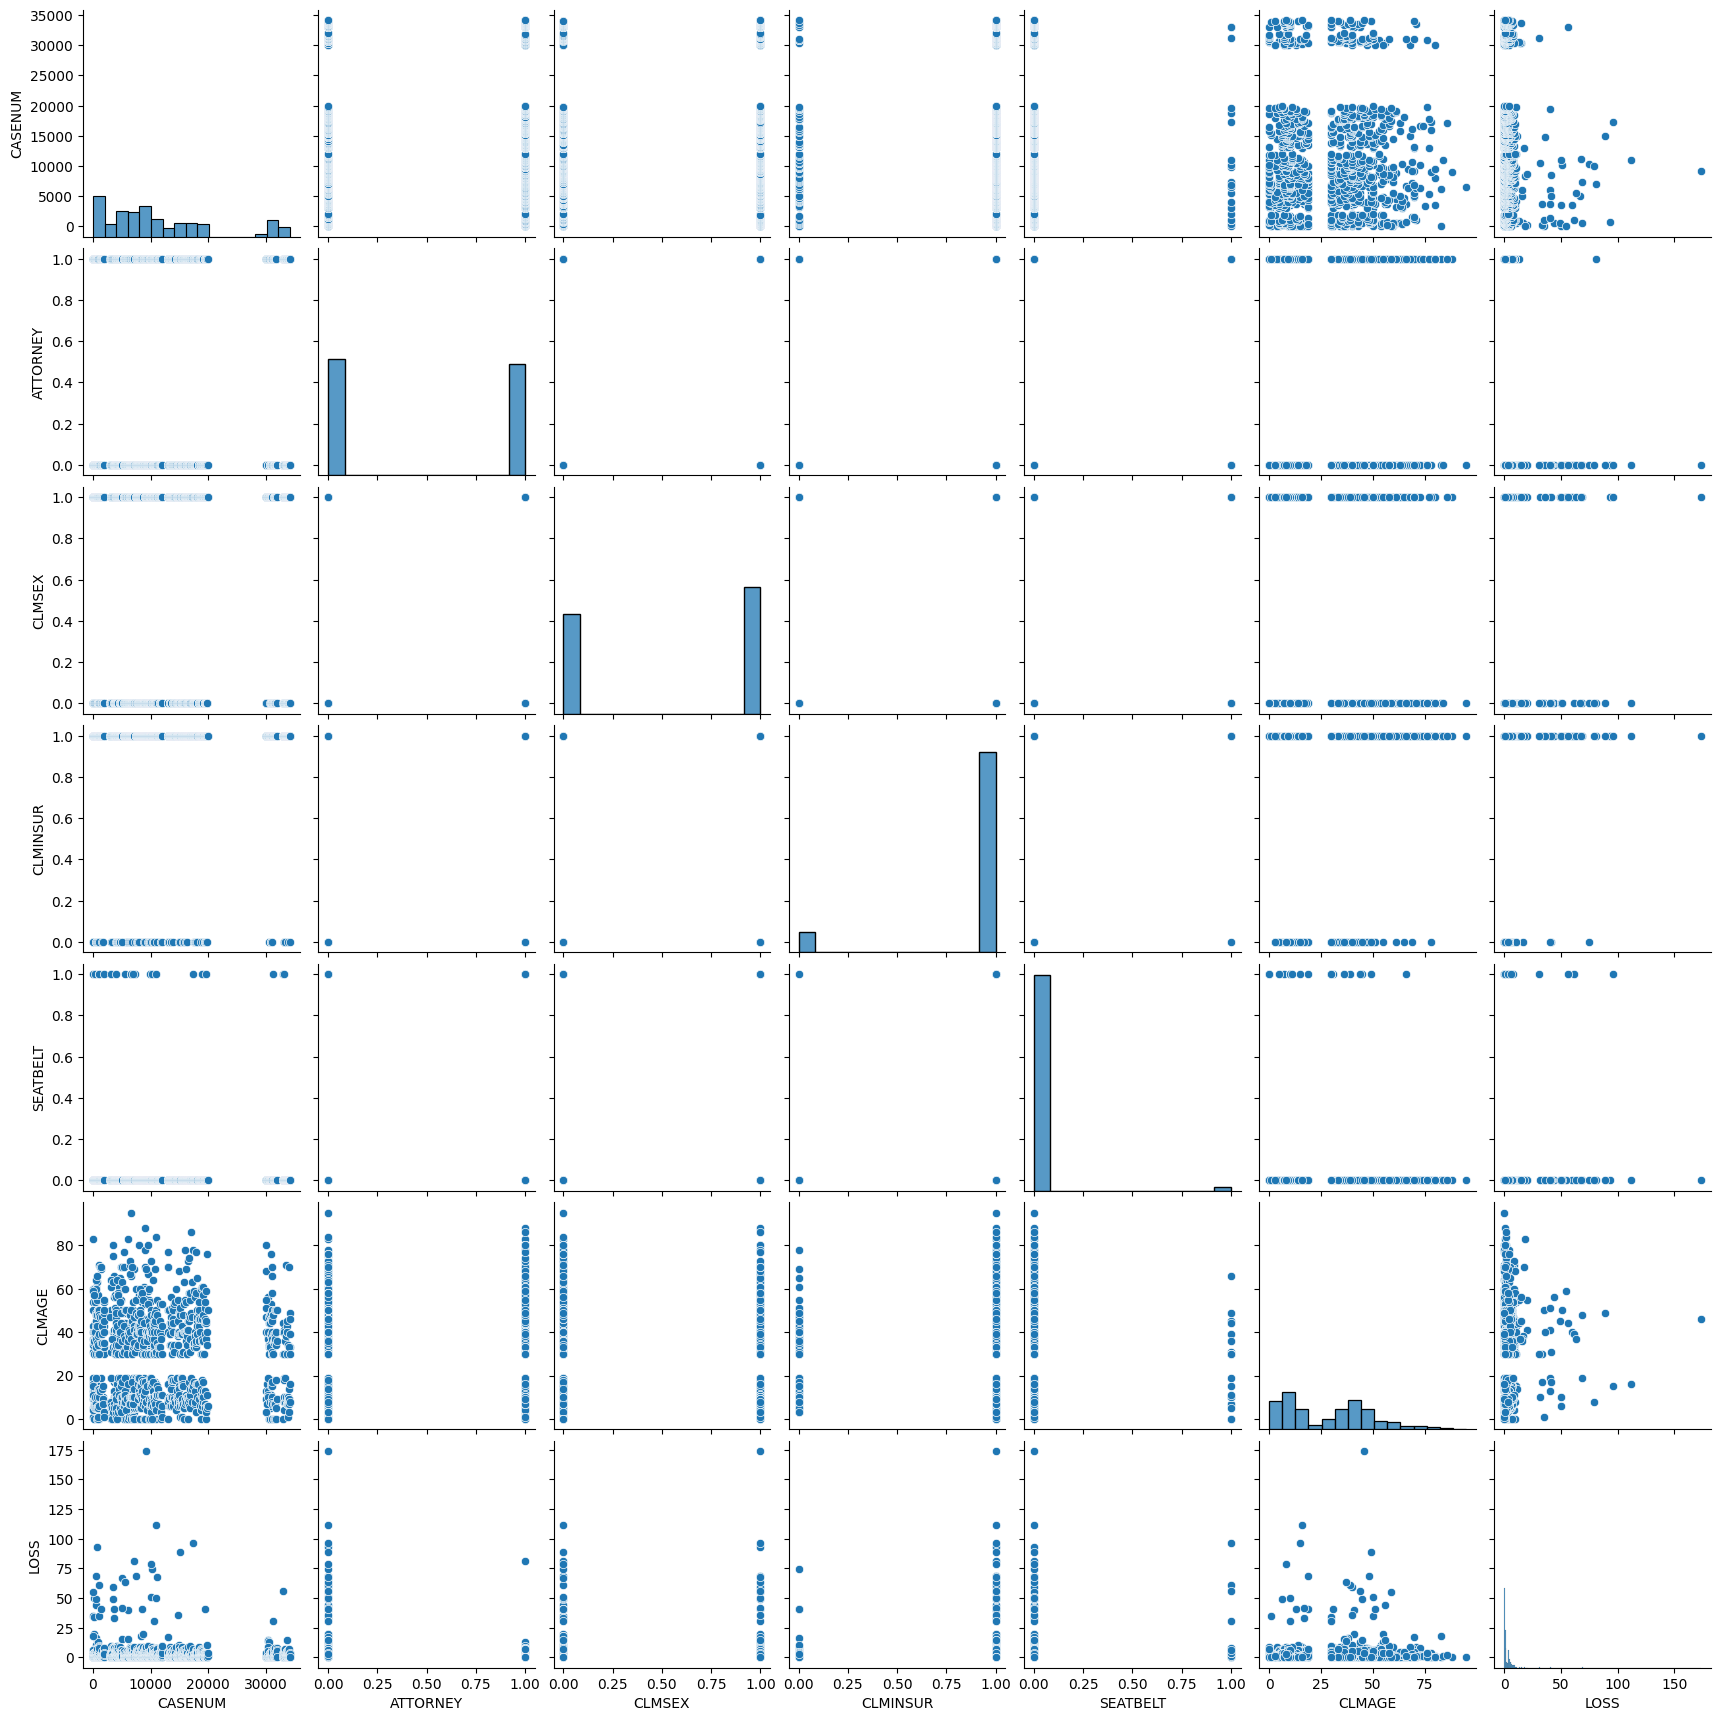

In [19]:
#pairplot
sns.pairplot(claimants)

In [20]:
len(claimants['CASENUM'].unique())

1283

In [21]:
#dropping the 'CASENUM' column as it is not required
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [22]:
claimants.shape

(1340, 6)

In [23]:
#missing values percentage
claimants.isna().sum()/len(claimants)*100

ATTORNEY     0.000000
CLMSEX       0.895522
CLMINSUR     3.059701
SEATBELT     3.582090
CLMAGE      14.104478
LOSS         0.000000
dtype: float64

In [24]:
#Handle missing values and drop columns if you feel it is required

In [25]:
#Removing NA values in dataset
claimants = claimants.dropna()

In [26]:
claimants.shape

(1096, 6)

In [27]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


# Splitting Data

In [28]:
#Dividing our data into input and output variables

X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [29]:
X    #Independent variable/input

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [30]:
Y      #Dependent variable/output/Target

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

# Chossing the Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
classifier = LogisticRegression()

# Training the Model

In [33]:
classifier.fit(X,Y)

LogisticRegression()

# Testing the Model

In [34]:
#Predict for x dataset
y_pred = classifier.predict(X)

In [35]:
y_pred_df = pd.DataFrame({'actual': Y,
                          'predicted': classifier.predict(X)
                         })

In [36]:
print(y_pred_df.to_string())

      actual  predicted
0          0          0
1          1          1
2          1          1
3          0          0
4          1          1
5          0          1
6          0          0
7          0          0
8          1          1
10         0          0
11         0          0
12         1          0
13         0          1
14         1          1
15         1          1
16         1          1
17         0          1
18         1          1
19         0          0
21         1          1
22         0          0
24         1          0
25         1          1
26         1          1
27         0          1
28         1          1
30         1          0
32         1          1
33         0          1
34         0          0
35         0          0
36         0          0
37         0          0
38         1          1
39         0          0
40         1          1
41         0          0
42         0          0
43         1          0
44         1          1
46         0    

# Performance Metrics

* confusion matrix

In [37]:
#Confusion matrix for the model accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

[[381 197]
 [123 395]]


In [38]:
claimants['ATTORNEY'].value_counts()

ATTORNEY
0    578
1    518
Name: count, dtype: int64

In [39]:
#Classification report

from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



 Precision – What percent of your predictions were correct?

 Recall  – What percent of the positive cases did you catch?
  
 F1 score  – What percent of positive predictions were correct?

In [40]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [41]:
#intercept value
classifier.intercept_

array([-0.17361679])

In [42]:
#Other coeffieicents
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

* ROC Curve

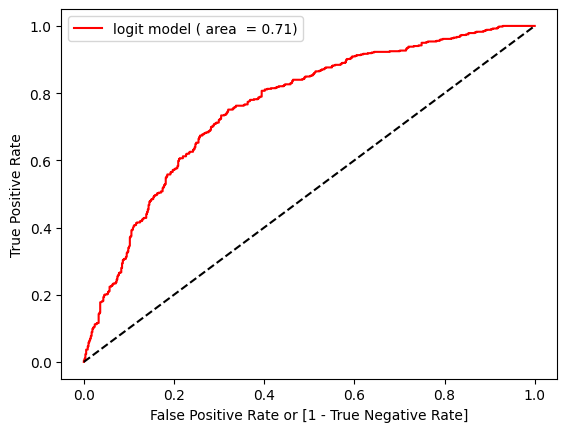

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [44]:
auc

0.7108589063606365

In [45]:
import statsmodels.api as sm

In [46]:
model1 =  sm.Logit(Y,X)
model1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.587825
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1096
Model:                          Logit   Df Residuals:                     1091
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.1501
Time:                        14:41:49   Log-Likelihood:                -644.26
converged:                       True   LL-Null:                       -758.05
Covariance Type:            nonrobust   LLR p-value:                 4.379e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.4040      0.131      3.086      0.002       0.147       0.661
CLMINSUR       0.4516      0.136      3.317      0.001       0.185       0.718
SEATBELT      -0.7980      0.566     -1.411      0.158      -1.907       0.311
CLMAGE         0.0057      0.003      1.792      0.073      -0.001       0.012
LOSS          -0.3900      0.034    -11.349      0.000      -0.457      -0.323
==============================================================================
"""

* accuracy score

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

0.708029197080292

# Conclusion

* Performance of model remain same for classification report & ROC curve , i.e.0.71

* accuracy score = 0.71